<h1> WEEK I

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [13]:
df = pd.read_csv('insurance.csv')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h1> EDA

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='region', ylabel='count'>

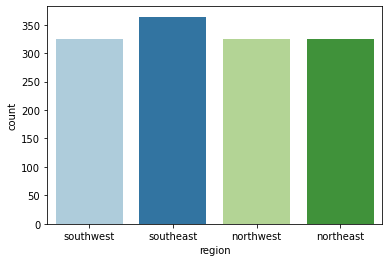

In [16]:
sns.countplot(x='region', palette = 'Paired',data=df)

- the data is Equally diivded from each region

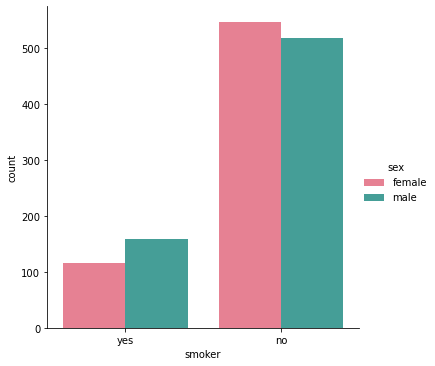

In [17]:
sns.catplot(x = 'smoker',kind= 'count' , hue = 'sex', palette = 'husl', data = df)

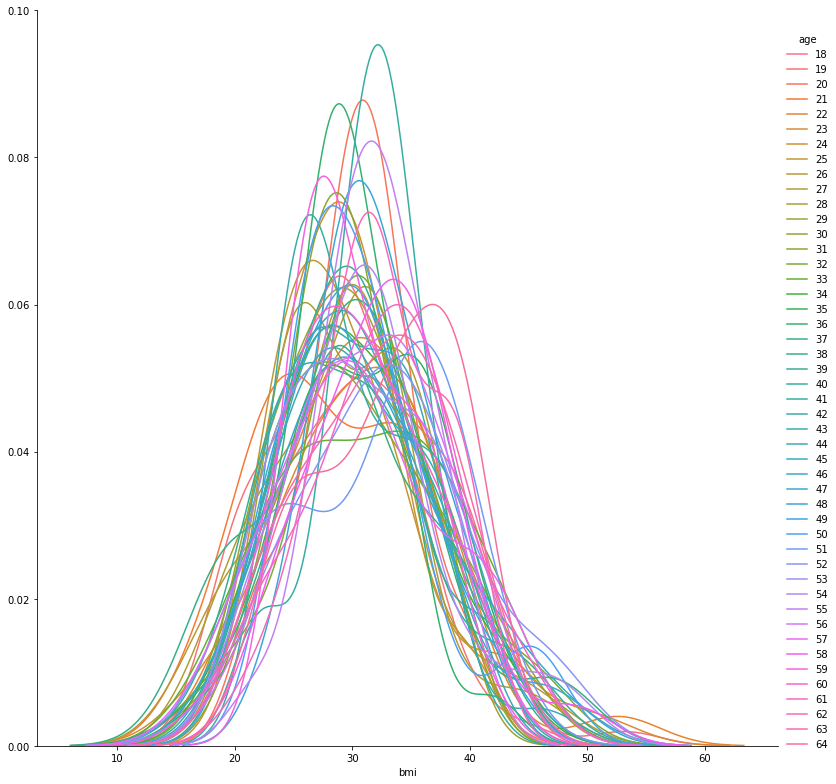

In [18]:
sns.FacetGrid(data = df, hue = 'age',height =11).map(sns.kdeplot, 'bmi').add_legend()

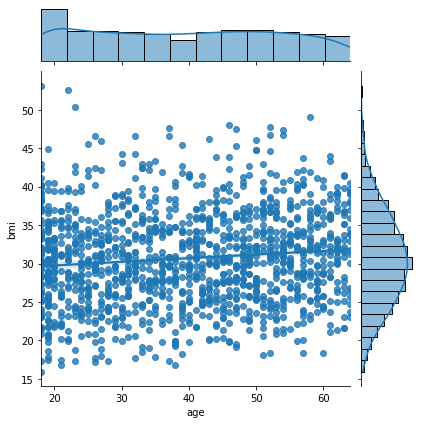

In [19]:
sns.jointplot(x='age', y='bmi', data = df,  kind='reg')

- No relation exits between age and bmi

<AxesSubplot:xlabel='smoker', ylabel='age'>

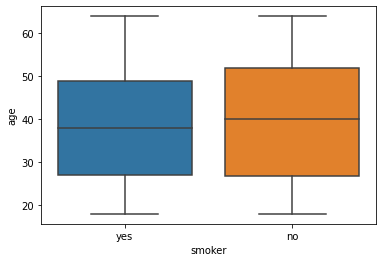

In [20]:
sns.boxplot(x= 'smoker', y= 'age', data=df)

- The smolkers bandwidth is maximum berween age of 25-48

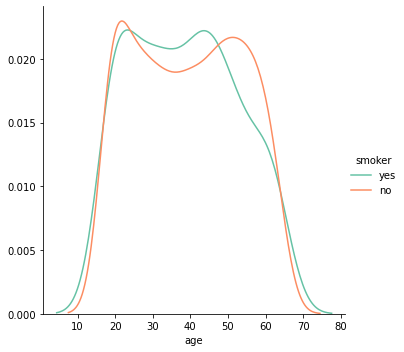

In [21]:
sns.FacetGrid(data = df, hue ='smoker', height = 5, palette='Set2').map(sns.kdeplot, 'age').add_legend()

<h1> Data Prepration

<h3> Data cleaning

- The data is very clean, no need for data Clensing

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
print(df['sex'].unique())
print(df['children'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


<h3>Data transformation

In [24]:
# X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)

<h3>Feature engineering

In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
final_df = df
final_df.drop('charges',axis=1,inplace=True)
final_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [27]:
X = final_df.iloc[:,:].values

In [28]:
df.corr()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.017163,0.007673,0.024806,-0.023066,0.021914
sex_male,-0.020856,0.046371,0.017163,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


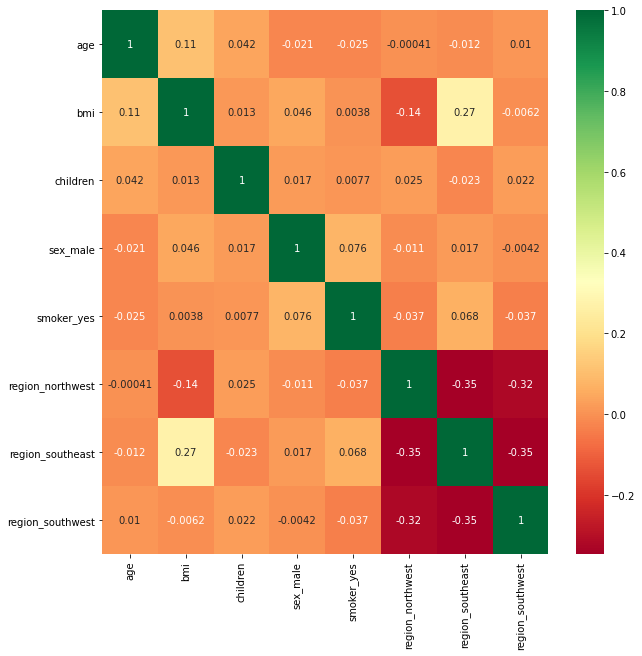

In [29]:
corrmat=final_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Splitting

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1));

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680434

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train,order='C'), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 72.65 %
Standard Deviation: 5.58 %


<h2>Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6982031111287242

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train,order='C'), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 63.37 %
Standard Deviation: 8.86 %


<h2>Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 42 )
regressor.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(n_estimators=50, random_state=42)

In [27]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8829787680552641

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train,order='C'), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.04 %
Standard Deviation: 3.89 %
